In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from itertools import product
from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from scipy import stats


In [ ]:
df = pd.read_csv('/content/Toddler-Autism- data.csv')
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
df.shape

(1054, 19)

In [ ]:
#Check Null
df.isnull().values.any()

False

In [ ]:
len(df[df['Sex']=='m'])

735

In [ ]:
len(df[df['Sex']=='f'])

319

In [ ]:
len(df[df['Sex']=='f'])

319

In [ ]:
df.rename(columns = {'Class/ASD Traits ':'Class/ASD'}, inplace = True)

In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD'],
      dtype='object')

In [ ]:
positive = df[df['Class/ASD']=='Yes']
len(positive)

728

In [ ]:
negative = df[df['Class/ASD']=='No']
len(negative)

326

In [ ]:
len(positive[positive['Sex']=='m'])

534

In [ ]:
len(positive[positive['Sex']=='f'])

194

In [ ]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [ ]:
df.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  Class/

In [ ]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD              object
dtype: object

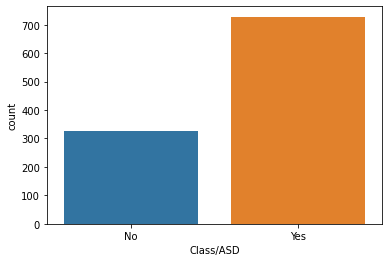

In [ ]:
sns.countplot(x='Class/ASD' , data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

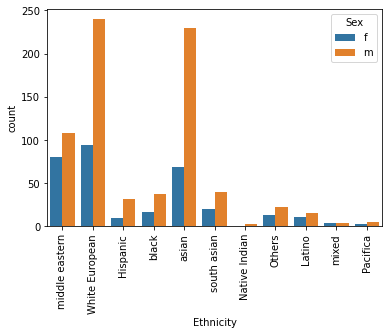

In [ ]:
sns.countplot(x='Ethnicity',hue='Sex',data=df)
plt.xticks(rotation=90)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD', 'Sex', 'Jaundice']
for col in columns:
   df[col] = le.fit_transform(df[col])
df.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Qchat-10-Score         int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD              int64
dtype: object

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD'],
      dtype='object')

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,1


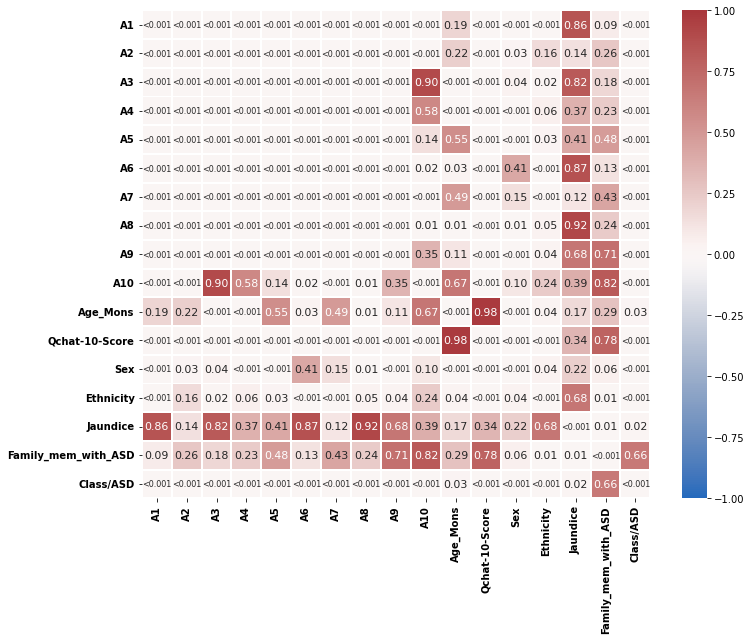

In [ ]:
df1 = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD']]
df2 = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD']]
def compute_corr_and_p(df1, df2):
  corrs = pd.DataFrame(index=df1.columns, columns=df2.columns, dtype=np.float64)
  pvals = corrs.copy()
  
  for i, j in product(df1.columns, df2.columns):
    corrs.loc[i,j], pvals.loc[i,j] = pearsonr(df1[i], df2[j])
  
  return corrs, pvals

def plot(corrs, pvals, siglevel=.01):
  mask = np.zeros_like(corrs, dtype=np.bool)
  mask[np.triu_indices_from(mask) | (pvals >= siglevel) ] = True

  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  sns.heatmap(pvals,  cmap=cmap, center=0, square=True, linewidths=.5,
           cbar_kws={'shrink': .5}, annot=True)
cor, p = compute_corr_and_p(df1,df2)
plt.figure( figsize=(11,9))
g = sns.heatmap(p,vmin=-1, vmax=1, cmap='vlag',annot=True, annot_kws={"size":7}, fmt='.2f', linewidths=1, linecolor='w')
# plot(cor, p, 0.01)
mask = np.invert(np.tril(p<0.05))
# fig = plt.figure(figsize=(4,4))
# sns.heatmap(p, cmap="vlag", vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='w')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
for text in g.texts:
    text.set_size(11)
    if text.get_text() < '0.001':
        text.set_text('<0.001')
        text.set_size(8)
        # text.set_weight('bold')

# Save a high-res copy of the image to disk
plt.tight_layout()

In [ ]:
ASD1 = df[df['Class/ASD']==1]
ASD0 = df[df['Class/ASD']==0]

In [ ]:
target = df['Class/ASD']

In [ ]:
features=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD']

In [ ]:
x = df[features]
y = df['Class/ASD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
acc = knn.score(x_test, y_test)
y_pred = knn.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))

Accuracy: 0.9772727272727273
f1: 0.9772727272727273
precision_score: 0.9772727272727273
recall_score: 0.9772727272727273


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
acc = rf.score(x_test, y_test)
y_pred = rf.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))

Accuracy: 1.0
f1: 1.0
precision_score: 1.0
recall_score: 1.0


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
svc = svm.SVC()
svc.fit(x_train, y_train)
acc = svc.score(x_test, y_test)
y_pred = svc.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
precision_score = precision_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred, average='micro')
print('Accuracy: '+ str(acc))
print('f1: '+ str(f1))
print('precision_score: '+ str(precision_score))
print('recall_score: '+ str(recall_score))

Accuracy: 0.9924242424242424
f1: 0.9924242424242424
precision_score: 0.9924242424242424
recall_score: 0.9924242424242424
